### Import and setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings
from pathlib import Path
RANDOM_STATE = 27
plt.style.use('bmh')
pd.set_option("display.max_columns", 100)
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix

set_config(display='diagram')


In [3]:
from ipynb.fs.full.AnalysisTools import nullInfo,nullInfoCompare, dropColumns

In [4]:
train_features = pd.read_csv("data/train_values.csv", index_col="building_id")
train_labels = pd.read_csv("data/train_labels.csv", index_col="building_id")
test_features = pd.read_csv("data/test_values.csv", index_col="building_id")

In [5]:
print(train_features.shape, train_labels.shape,test_features.shape)

(260601, 38) (260601, 1) (86868, 38)


In [6]:
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

In [7]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

### Visualization

<Figure size 864x576 with 0 Axes>

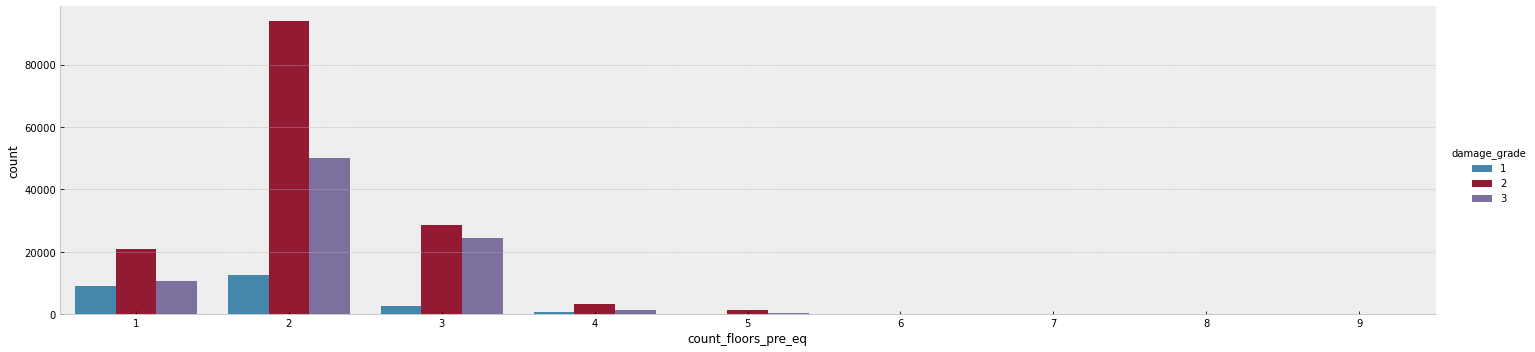

In [23]:
plt.figure(figsize=(12,8))
sns.factorplot('count_floors_pre_eq', data = df,kind = 'count', hue='damage_grade', aspect = 4)

<Figure size 864x576 with 0 Axes>

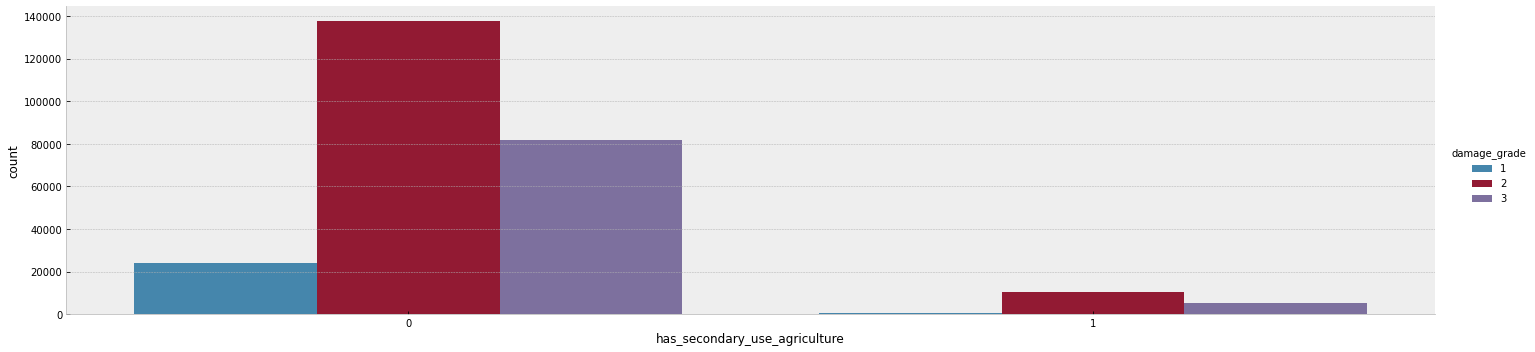

In [24]:
plt.figure(figsize=(12,8))
sns.factorplot('has_secondary_use_agriculture', data = df,kind = 'count', hue='damage_grade', aspect = 4)

In [25]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [35]:
df_new = df[['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']]

In [36]:
superstructure_cols = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

In [38]:
df_new

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0,3
28830,0,1,0,0,0,0,0,0,0,0,0,2
94947,0,1,0,0,0,0,0,0,0,0,0,3
590882,0,1,0,0,0,0,1,1,0,0,0,2
201944,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688636,0,1,0,0,0,0,0,0,0,0,0,2
669485,0,1,0,0,0,0,0,0,0,0,0,3
602512,0,1,0,0,0,0,0,0,0,0,0,3


In [39]:
def add(x):
    cumcount = 0 
    for i in superstructure_cols: 
        cumcount += x[i]
    return cumcount  


In [45]:
df_new['Added'] = df_new.apply(add, axis=1)

In [46]:
df_new

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,Added
building_id,,,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0,3,2
28830,0,1,0,0,0,0,0,0,0,0,0,2,1
94947,0,1,0,0,0,0,0,0,0,0,0,3,1
590882,0,1,0,0,0,0,1,1,0,0,0,2,3
201944,1,0,0,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,0,1,0,0,0,0,0,0,0,0,0,2,1
669485,0,1,0,0,0,0,0,0,0,0,0,3,1
602512,0,1,0,0,0,0,0,0,0,0,0,3,1


<Figure size 864x576 with 0 Axes>

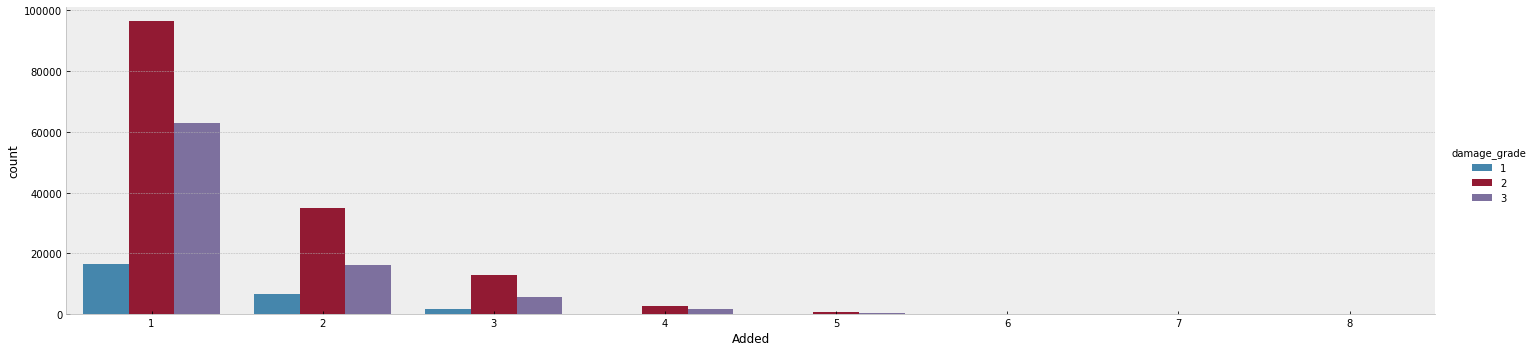

In [49]:
plt.figure(figsize=(12,8))
sns.factorplot('Added', data = df_new,kind = 'count', hue='damage_grade', aspect = 4)

In [54]:
def add(x):
    count = '' 
    for i in superstructure_cols: 
        count += str(x[i])
    return count  

In [55]:
df_new['merge'] = df_new.apply(add, axis=1)

<Figure size 864x576 with 0 Axes>

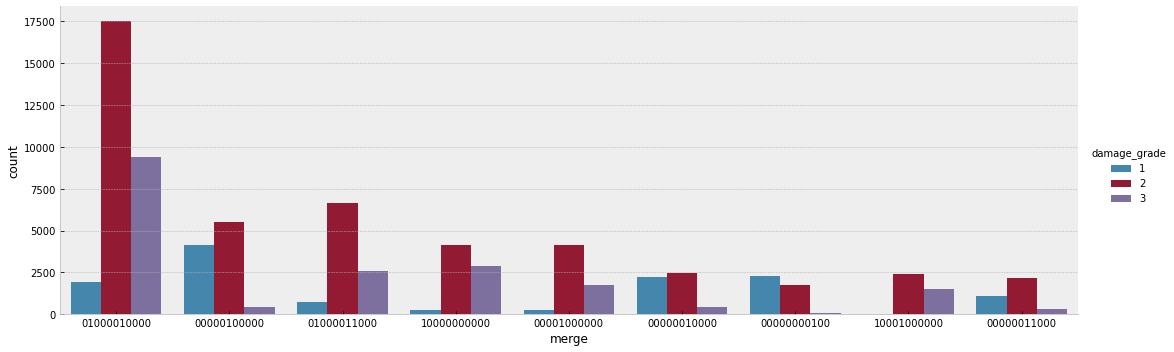

In [68]:
plt.figure(figsize=(12,8))
sns.factorplot('merge', data = df_new,kind = 'count', hue='damage_grade', aspect =3,order=df_new['merge'].value_counts().iloc[1:10].index)


In [62]:
df_new['merge'].value_counts()

01000000000    137134
01000010000     28861
00000100000     10106
01000011000      9980
10000000000      7229
                ...  
11100110100         1
01101110100         1
10000001100         1
01100101000         1
10110001000         1
Name: merge, Length: 505, dtype: int64

In [ ]:
df_new['merge'].value_counts()

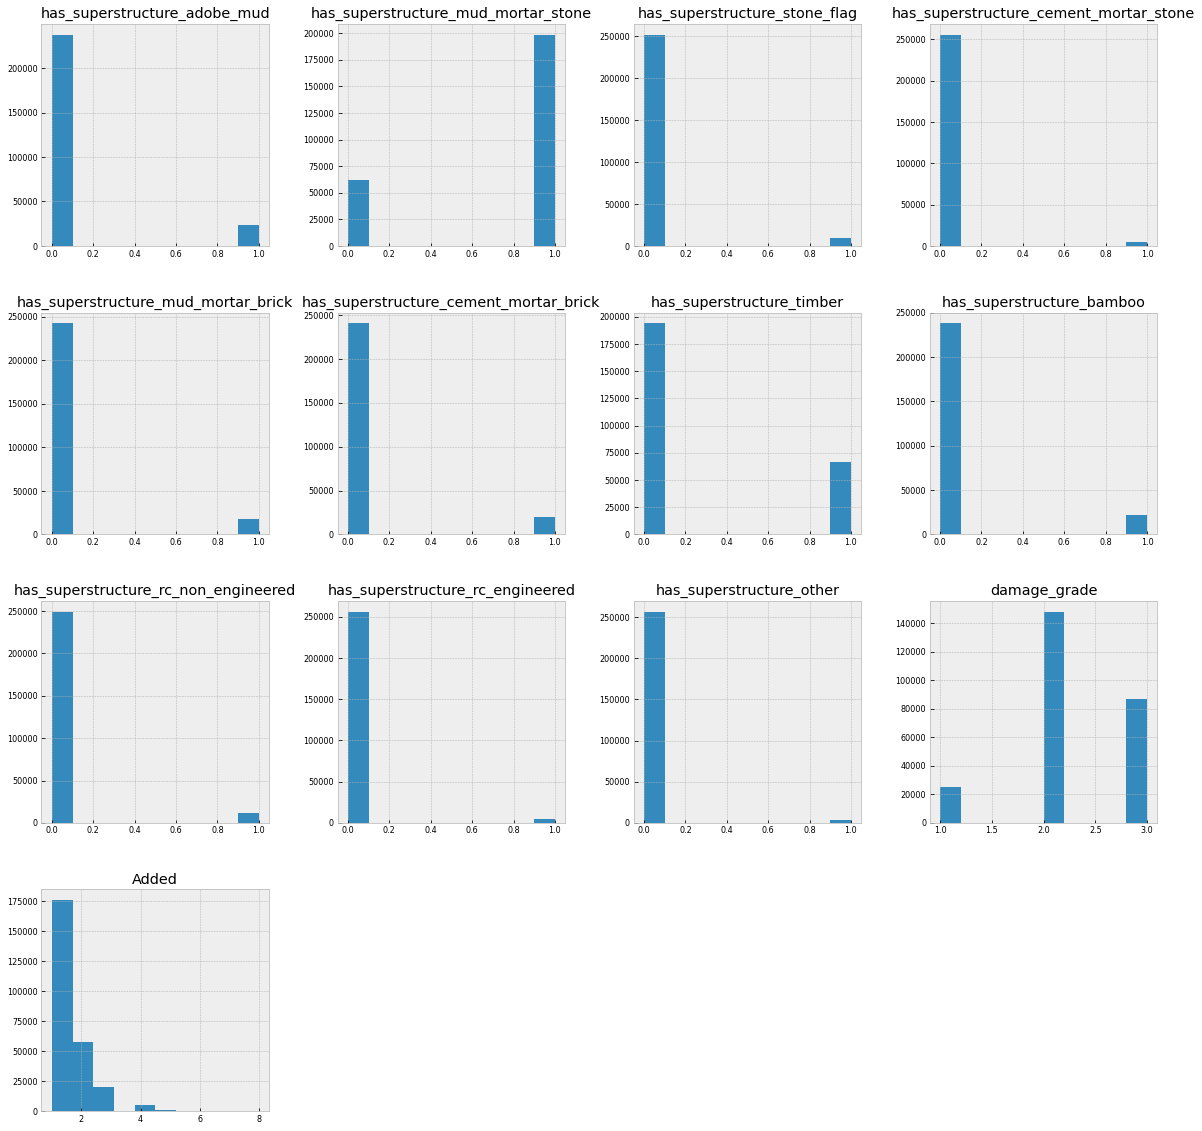

In [69]:
df_new.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8);

### Previous Chunk

<AxesSubplot:ylabel='building_id'>

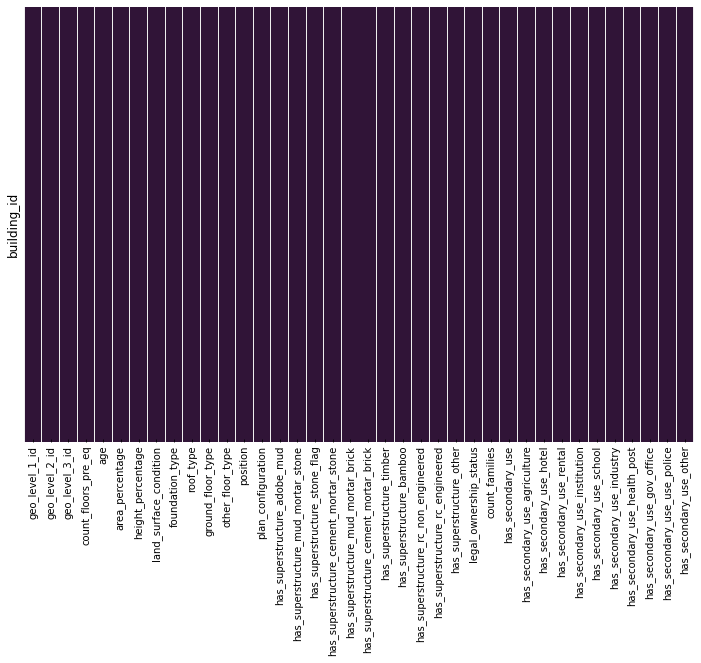

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train_features.isnull(),  yticklabels=False, cbar=False, cmap='twilight_shifted')

<AxesSubplot:ylabel='building_id'>

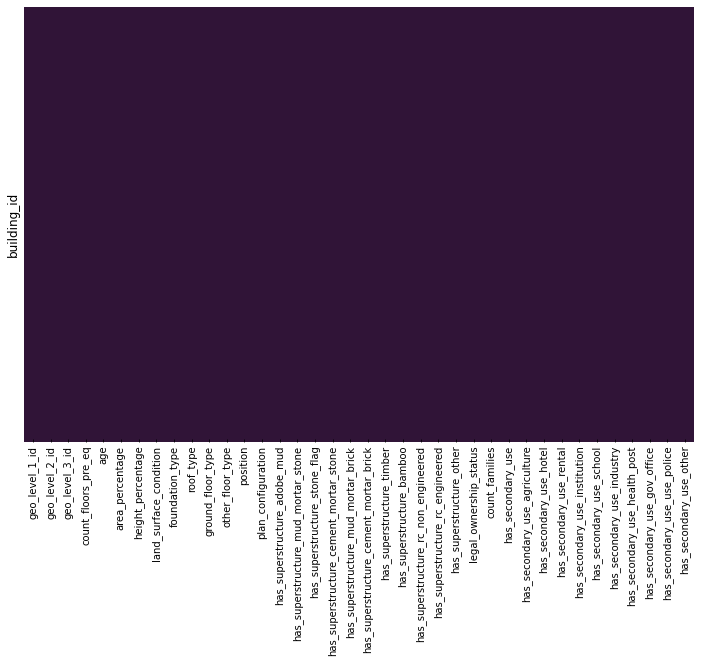

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(test_features.isnull(), yticklabels=False, cbar=False, cmap='twilight_shifted')

In [10]:
nullInfo(train_features)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,geo_level_1_id,int64,31,0,0.0
1,geo_level_2_id,int64,1414,0,0.0
2,geo_level_3_id,int64,11595,0,0.0
3,count_floors_pre_eq,int64,9,0,0.0
4,age,int64,42,0,0.0
5,area_percentage,int64,84,0,0.0
6,height_percentage,int64,27,0,0.0
7,land_surface_condition,object,3,0,0.0
8,foundation_type,object,5,0,0.0
9,roof_type,object,3,0,0.0


In [11]:
nullInfo(test_features)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,geo_level_1_id,int64,31,0,0.0
1,geo_level_2_id,int64,1364,0,0.0
2,geo_level_3_id,int64,10213,0,0.0
3,count_floors_pre_eq,int64,8,0,0.0
4,age,int64,36,0,0.0
5,area_percentage,int64,73,0,0.0
6,height_percentage,int64,28,0,0.0
7,land_surface_condition,object,3,0,0.0
8,foundation_type,object,5,0,0.0
9,roof_type,object,3,0,0.0


In [12]:
nullInfo(train_labels)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,damage_grade,int64,3,0,0.0


In [13]:
corr_matrix = df.corr()

<AxesSubplot:>

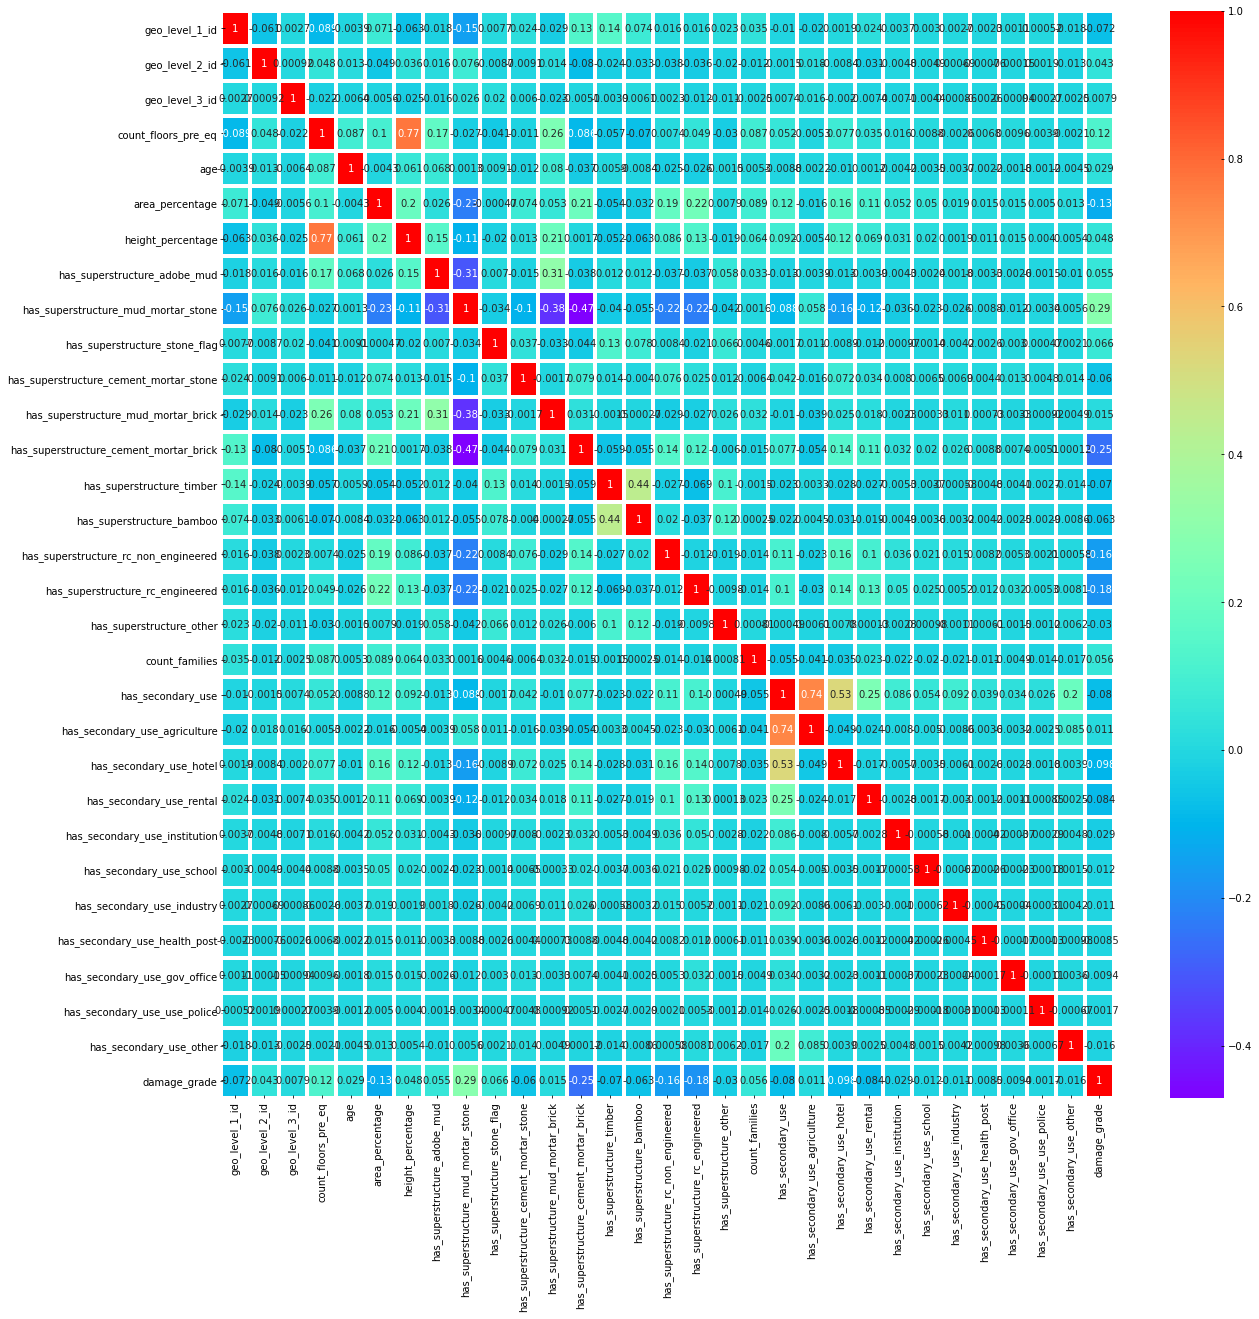

In [14]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap="rainbow", annot=True,linewidths=3)

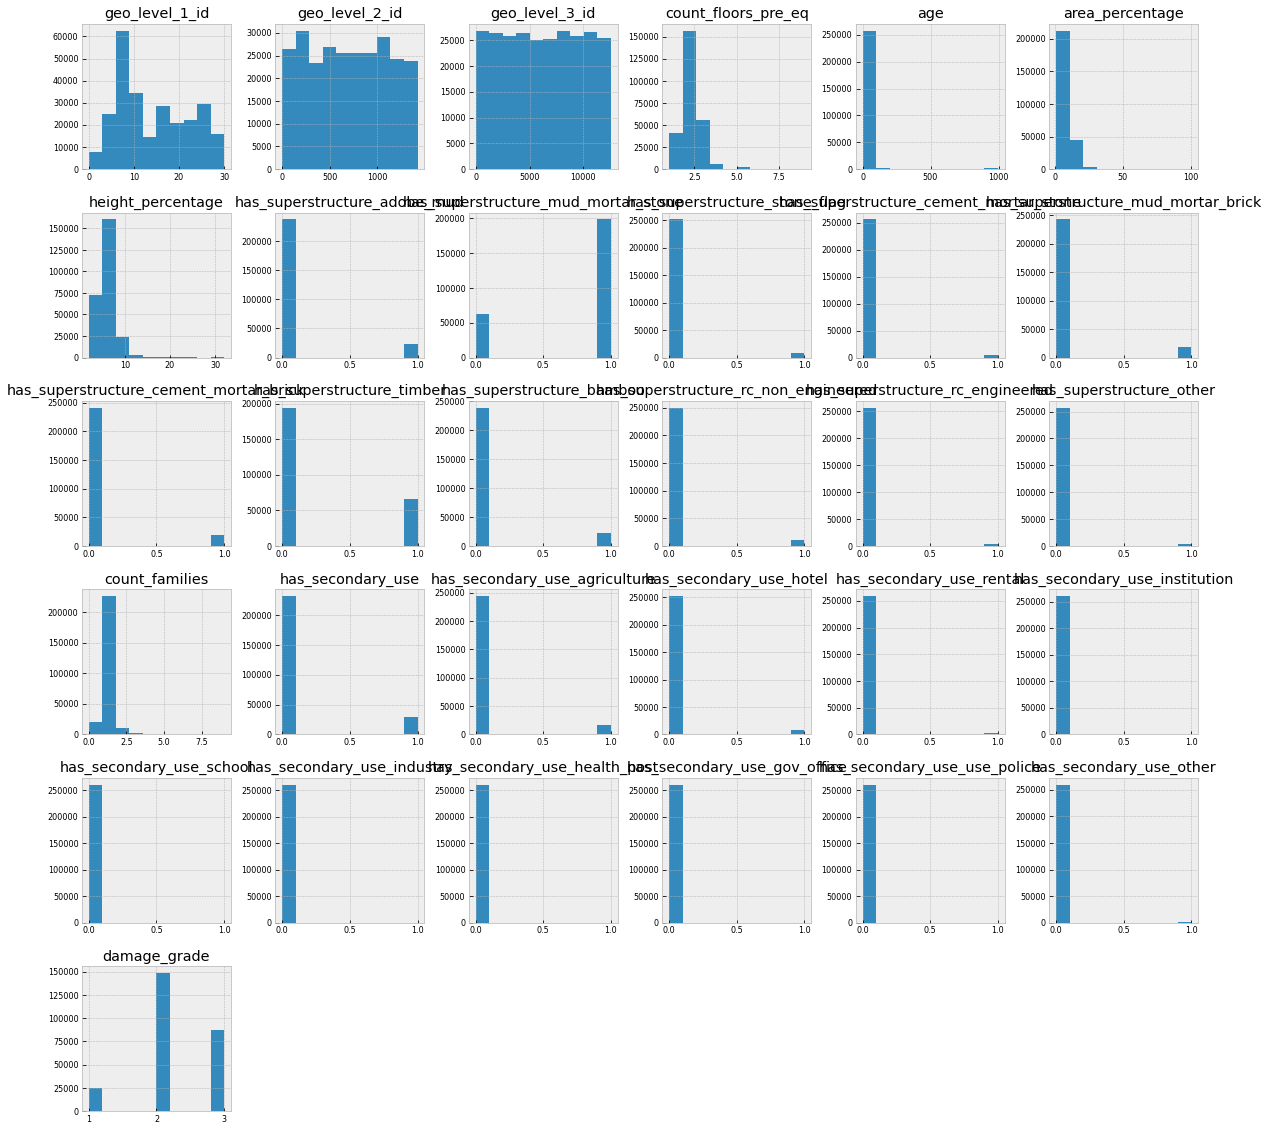

In [15]:
df.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8);

In [13]:
# PPS related stuff
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

matrix_train = pps.matrix(df) 

In [14]:
matrix_df = matrix_train[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# plt.figure(figsize = (60,60))
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True )

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

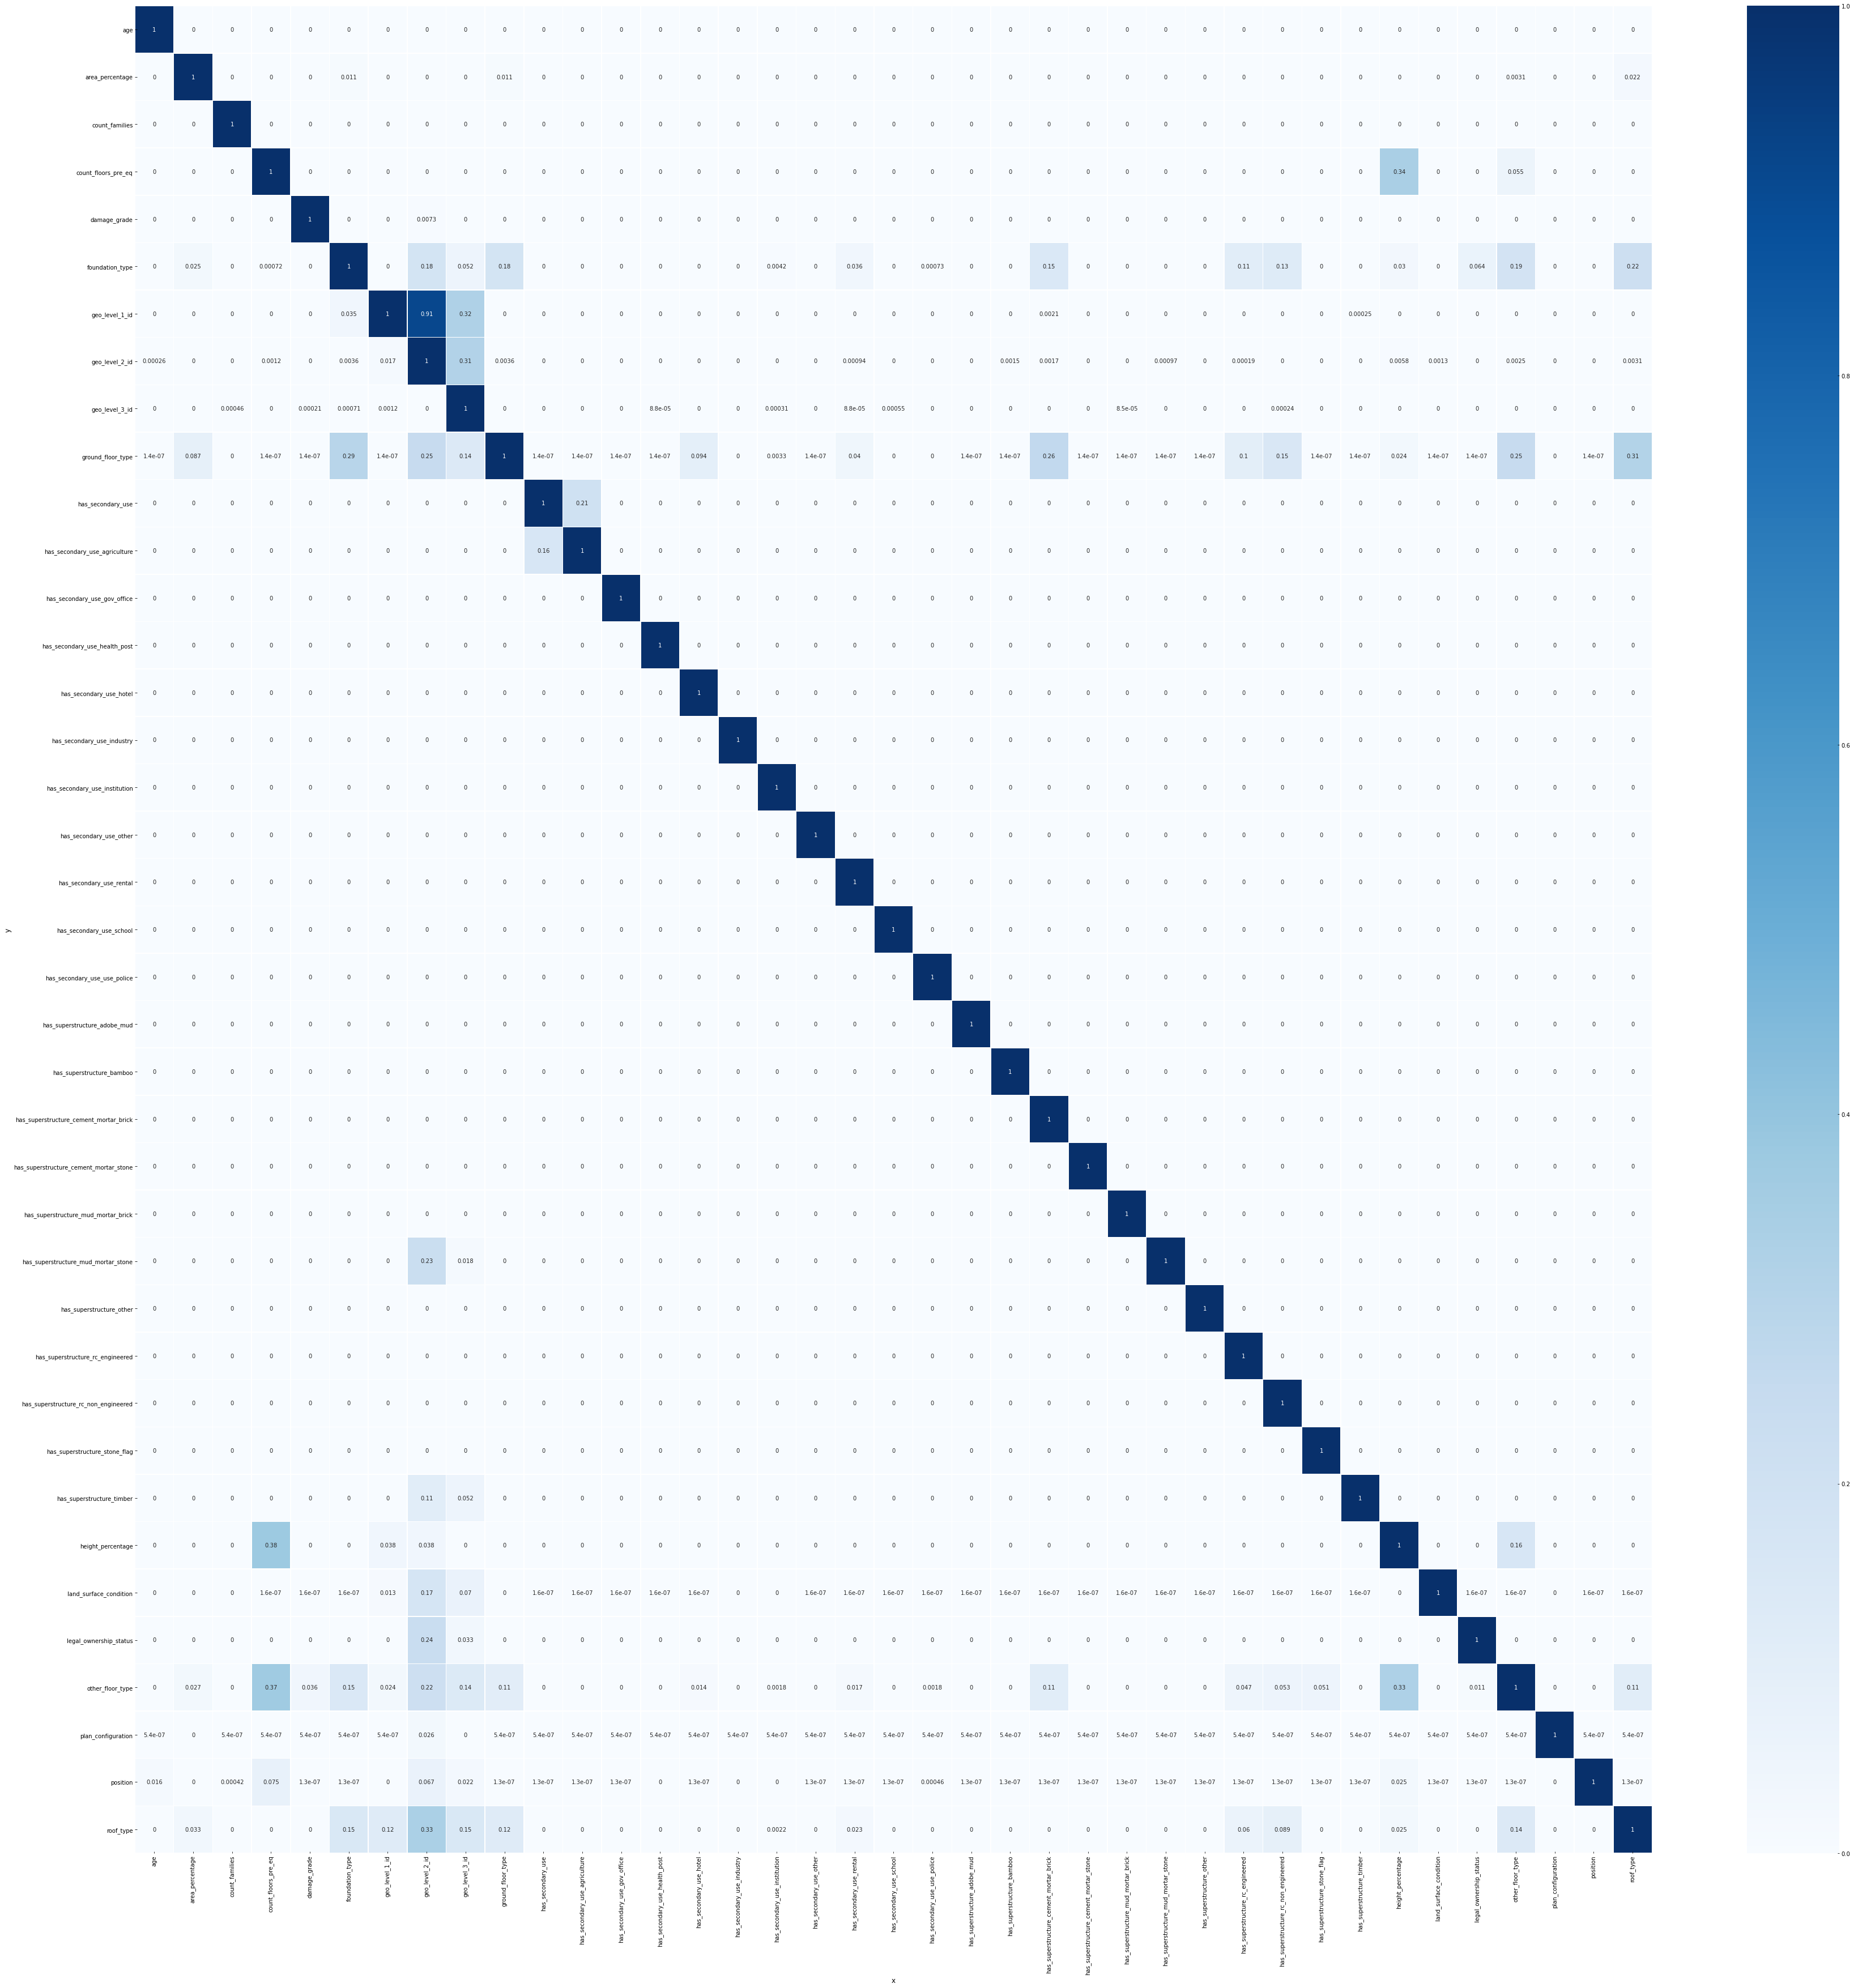

In [16]:
plt.figure(figsize = (60,60))
sns_plot = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True )
sns_plot.savefig("output.png")

In [16]:
train_labels.value_counts()

damage_grade
2               148259
3                87218
1                25124
dtype: int64

In [17]:
X = train_features
y = train_labels 

# dividing X, y into train and test data 
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, 
    test_size=0.3,
    shuffle=True,
    stratify=y,
    random_state=27) 

In [18]:
numeric_cols = train_features.columns[train_features.dtypes != "object"].values
object_cols = train_features.columns[train_features.dtypes == "object"].values


In [19]:
# from catboost import CatBoostClassifier
# rf_classifier =CatBoostClassifier(iterations=2,
#                            depth=2,
#                            learning_rate=1,
#                            cat_features=object_cols,
#                            loss_function='MultiClass',
#                            verbose=True)

# # rf_classifier.fit(X_train, y_train)
# # rf_predictions = rf_classifier.predict(X_test)
# # accuracy_score(y_test, rf_predictions)


# classifier = MultiOutputClassifier(estimator=rf_classifier)


In [21]:
from catboost import CatBoostClassifier, Pool, cv

# import catboost
# w = catboost.CatboostIpythonWidget('../input/')
# w.update_widget()

train_pool = Pool(data=X_train, label=y_train, cat_features=object_cols)
test_pool = Pool(data=X_eval, label=y_eval, cat_features=object_cols)

#reset model object every time this function is called
model = None

model = CatBoostClassifier(
    iterations= 150,
    loss_function='MultiClass',
#     l2_leaf_reg=10,
    cat_features=object_cols,
    eval_metric = 'TotalF1',
    use_best_model=True,
    logging_level='Silent')

model = model.fit(train_pool,
          eval_set=test_pool,
          plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
preds_class = model.predict(X_eval)

In [ ]:
display(F'Learning Rate set to: {model.get_all_params()}')
display(F'Accuracy Score: {accuracy_score(y_eval, preds_class)}')
display(F"F1-Score: {f1_score(y_eval, preds_class,average='micro')}")
plot_confusion_matrix(model, X_eval, y_eval)

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
preds = classifier.predict_proba(X_eval)
preds

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval, y_preds)

In [ ]:
# df_test_transformed = encoder.transform(test_features_df)
test_probas = rf_classifier.predict(test_features)
test_probas

In [ ]:
submission_df = pd.read_csv("SubmissionFormat.csv", index_col="id")

In [ ]:
submission_df.head()

In [ ]:
 Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = test_probas

submission_df.head()

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)